In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
## Read training data
train_data = pd.read_csv('datasets/train.csv', delimiter=',')
X = train_data.iloc[:,2:]
y = train_data.iloc[:,1]

In [3]:
## Check data
print("\n===== CHECK DATA =====")
print("TRAIN DATA")
print(train_data.head())
print("\n")
print("ORIGINAL FEATURES")
print(X.head())
print("\n")
print("TARGET")
print(y.head())


===== CHECK DATA =====
TRAIN DATA
   Id         y    x1    x2    x3    x4    x5
0   0 -6.822679  0.02  0.05 -0.09 -0.43 -0.08
1   1 -6.326290 -0.13  0.11 -0.08 -0.29 -0.03
2   2 -9.302728  0.08  0.06 -0.07 -0.41 -0.03
3   3 -7.371893  0.02 -0.12  0.01 -0.43 -0.02
4   4 -6.027647 -0.14 -0.12 -0.08 -0.02 -0.08


ORIGINAL FEATURES
     x1    x2    x3    x4    x5
0  0.02  0.05 -0.09 -0.43 -0.08
1 -0.13  0.11 -0.08 -0.29 -0.03
2  0.08  0.06 -0.07 -0.41 -0.03
3  0.02 -0.12  0.01 -0.43 -0.02
4 -0.14 -0.12 -0.08 -0.02 -0.08


TARGET
0   -6.822679
1   -6.326290
2   -9.302728
3   -7.371893
4   -6.027647
Name: y, dtype: float64


In [7]:
## Make the new features
# phi_j(x) = x_j

# Linear features are already the x1, ..., x5

# Quadratic features
X["x6"] = X["x1"]**2
X["x7"] = X["x2"]**2
X["x8"] = X["x3"]**2
X["x9"] = X["x4"]**2
X["x10"] = X["x5"]**2

# Exponential features
X["x11"] = np.exp(X["x1"])
X["x12"] = np.exp(X["x2"])
X["x13"] = np.exp(X["x3"])
X["x14"] = np.exp(X["x4"])
X["x15"] = np.exp(X["x5"])

# Cosine features
X["x16"] = np.cos(X["x1"])
X["x17"] = np.cos(X["x2"])
X["x18"] = np.cos(X["x3"])
X["x19"] = np.cos(X["x4"])
X["x20"] = np.cos(X["x5"])

# Constant
X["x21"] = 1

# Check new features
print("NEW FEATURES")
print(X.head())

NEW FEATURES
     x1    x2    x3    x4    x5      x6      x7      x8      x9     x10  ...  \
0  0.02  0.05 -0.09 -0.43 -0.08  0.0004  0.0025  0.0081  0.1849  0.0064  ...   
1 -0.13  0.11 -0.08 -0.29 -0.03  0.0169  0.0121  0.0064  0.0841  0.0009  ...   
2  0.08  0.06 -0.07 -0.41 -0.03  0.0064  0.0036  0.0049  0.1681  0.0009  ...   
3  0.02 -0.12  0.01 -0.43 -0.02  0.0004  0.0144  0.0001  0.1849  0.0004  ...   
4 -0.14 -0.12 -0.08 -0.02 -0.08  0.0196  0.0144  0.0064  0.0004  0.0064  ...   

        x12       x13       x14       x15       x16       x17       x18  \
0  1.051271  0.913931  0.650509  0.923116  0.999800  0.998750  0.995953   
1  1.116278  0.923116  0.748264  0.970446  0.991562  0.993956  0.996802   
2  1.061837  0.932394  0.663650  0.970446  0.996802  0.998201  0.997551   
3  0.886920  1.010050  0.650509  0.980199  0.999800  0.992809  0.999950   
4  0.886920  0.923116  0.980199  0.923116  0.990216  0.992809  0.996802   

        x19       x20  x21  
0  0.908966  0.996802    1

In [48]:
## By hand estimations
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# Check training features
print(X_train.head())

# Do not fit intercept as this is already taken care of by feature x21
fit_intercept = False

models = {
    "LinearRegression": LinearRegression(fit_intercept=fit_intercept),
    "Ridge": Ridge(alpha=0.5, max_iter=10000),
    "Lasso": Lasso(alpha=0.01, fit_intercept=fit_intercept, max_iter=10000),
}

# Train and evaluate the performance of the model
for model_name, model in models.items():
    print("\nTraining and evaluating model %s" %model_name)
    # Training
    model.fit(X_train, y_train)
    # Print coefficients
    print(model.coef_)
    # Make predictions for the test dataset
    y_test_prediction = model.predict(X_test)
    # Evaluate using RMSE
    print("RMSE: %.2e" %(np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction))))

       x1    x2    x3    x4    x5      x6      x7      x8      x9     x10  \
676  0.22  0.07 -0.03 -0.43 -0.02  0.0484  0.0049  0.0009  0.1849  0.0004   
175 -0.12 -0.18 -0.08 -0.24 -0.03  0.0144  0.0324  0.0064  0.0576  0.0009   
255 -0.29 -0.20  0.04 -0.23 -0.19  0.0841  0.0400  0.0016  0.0529  0.0361   
684 -0.45 -0.15  0.11 -0.43 -0.11  0.2025  0.0225  0.0121  0.1849  0.0121   
442 -0.26 -0.06 -0.22 -0.30 -0.05  0.0676  0.0036  0.0484  0.0900  0.0025   

     ...       x12       x13       x14       x15       x16       x17  \
676  ...  1.072508  0.970446  0.650509  0.980199  0.975897  0.997551   
175  ...  0.835270  0.923116  0.786628  0.970446  0.992809  0.983844   
255  ...  0.818731  1.040811  0.794534  0.826959  0.958244  0.980067   
684  ...  0.860708  1.116278  0.650509  0.895834  0.900447  0.988771   
442  ...  0.941765  0.802519  0.740818  0.951229  0.966390  0.998201   

          x18       x19       x20  x21  
676  0.999550  0.908966  0.999800    1  
175  0.996802  0.97133

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.88256422195468, tolerance: 2.6074089643618277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.941613663977023, tolerance: 2.6381086194579626
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.07987035355563, tolerance: 2.6074089643618277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWa

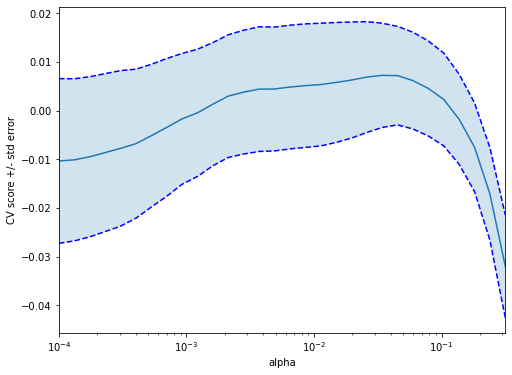

In [49]:
## Optimize Lasso regression parameter with a Grid Search
#  Re-used sample code at https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html
lasso = Lasso(fit_intercept=fit_intercept, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 7   # 100 events per fold

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

# Make figure
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.xlim([alphas[0], alphas[-1]])
plt.savefig("alpha_grid_search.pdf")

In [50]:
## Best regression parameter alpha
alpha_best = alphas[np.argmax(scores)]
print("Best regression parameter: %.2e" %alpha_best)

Best regression parameter: 3.42e-02


In [51]:
## Train Lasso model for the best regression parameter on the whole dataset
model = Lasso(alpha=alpha_best, fit_intercept=fit_intercept)
model.fit(X, y)
# Print coefficients
print(model.coef_)

[ 0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.09735143 -1.70115444
 -2.36995738 -0.         -0.         -0.74908748 -1.57227307 -0.
 -0.         -0.01984055 -0.        ]


In [52]:
## Make file to submit
file = open("to_submit.txt", "w") 
for coef in model.coef_:
    file.write(str(coef)+"\n")
file.close()

In [53]:
! cat to_submit.txt

0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
0.0
-0.0
0.0
-0.09735142827006918
-1.7011544441507798
-2.3699573762473896
-0.0
-0.0
-0.749087477667419
-1.5722730728859484
-0.0
-0.0
-0.019840549600982388
-0.0
